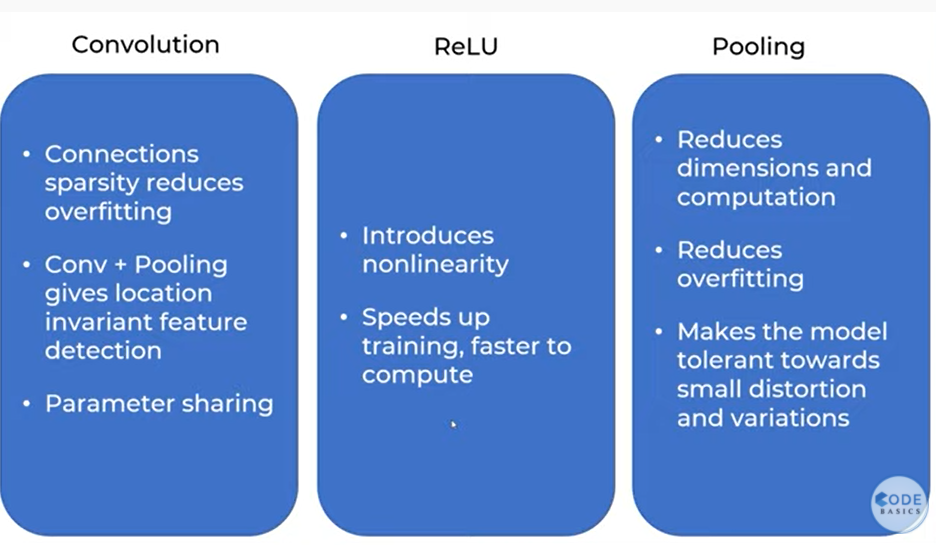

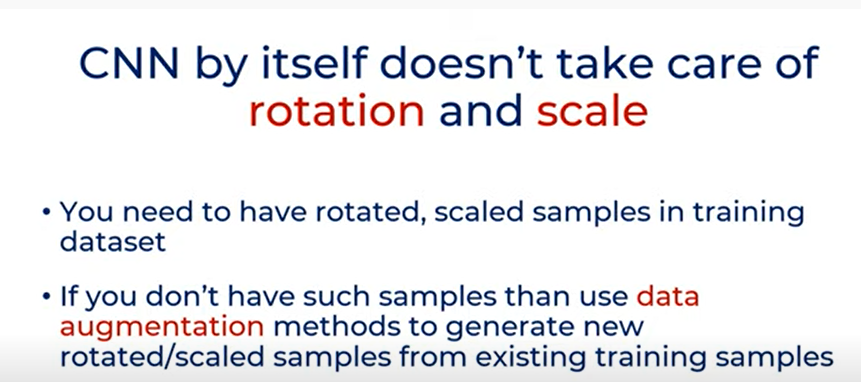

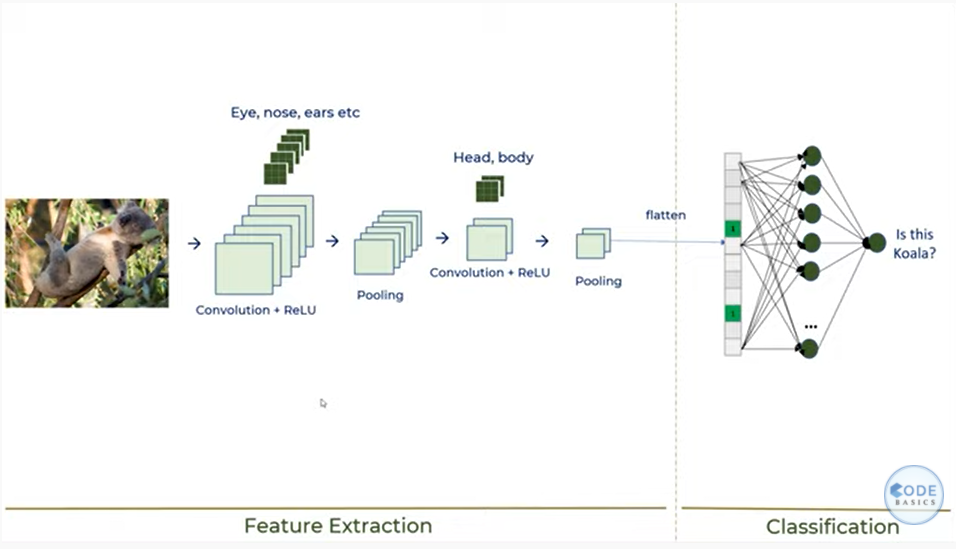

## **Import Libraries**

In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

## **Loading the Datasets**

In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(f"Shape of Training Samples : {x_train.shape}")
print(f"Shaoe of Testing Samples : {x_test.shape}")

Shape of Training Samples : (50000, 32, 32, 3)
Shaoe of Testing Samples : (10000, 32, 32, 3)


### **Reshape the y_train and y_test**

In [22]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [23]:
y_train.shape

(50000, 1)

In [24]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [25]:
y_train.shape

(50000,)

In [26]:
# Reshaping the Test-Dataset

In [27]:
y_test = y_test.reshape(-1,)
print(y_test)
print(y_test.shape)

[3 8 8 ... 5 1 7]
(10000,)


## **Plot Some Sample Images**

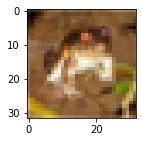

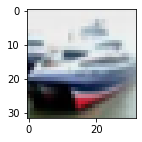

In [28]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[0])
plt.show()

plt.figure(figsize=(15,2))
plt.imshow(x_test[1])
plt.show()

In [29]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

## **Normalize the Dataset**

In [30]:
x_train = x_train/255
x_test = x_test/255

## **First of all let's check the performance on ANN**

In [31]:
ANN_model = keras.Sequential([
      keras.layers.Flatten(input_shape=(32,32,3)),
      keras.layers.Dense(3000, activation='relu'),
      keras.layers.Dense(1000, activation='relu'),
      keras.layers.Dense(10, activation='sigmoid')
])

ANN_model.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ANN_model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8059 - accuracy: 0.3574
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6205 - accuracy: 0.4283
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5390 - accuracy: 0.4578
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4784 - accuracy: 0.4776
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4304 - accuracy: 0.4954
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3863 - accuracy: 0.5123
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3475 - accuracy: 0.5275
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3138 - accuracy: 0.5392
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2836 - accuracy: 0.5486
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - 

#### **Accuracy_Score for ANN Model**

In [32]:
ANN_model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.3857 - accuracy: 0.5046


[1.3857303857803345, 0.5045999884605408]

## **Training the CNN-Model**

In [36]:
CNN_model = keras.Sequential([
      # CNN Layers
      keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),  # Convo + Relu
      keras.layers.MaxPooling2D((2,2)),     # Pooling

      keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),     # Convo + Relu
      keras.layers.MaxPooling2D((2,2)),     # Pooling

      # Dense Layers
      keras.layers.Flatten(),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(10, activation='softmax')
])

CNN_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

CNN_model.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4787 - accuracy: 0.4685
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1280 - accuracy: 0.6037
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9927 - accuracy: 0.6548
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9126 - accuracy: 0.6806
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8457 - accuracy: 0.7052
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7928 - accuracy: 0.7216
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7409 - accuracy: 0.7410
Epoch 8/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6994 - accuracy: 0.7548
Epoch 9/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6529 - accuracy: 0.7724
Epoch 10/50
1563/1563 [==============================] - 11s 7ms/step - l

#### **Accuracy-Score for CNN-Model**

In [37]:
CNN_model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 3.0003 - accuracy: 0.6588


[3.000307559967041, 0.6588000059127808]

#### **Predict for some test-dataset**

In [40]:
y_pred = CNN_model.predict(x_test)

In [49]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [50]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

### **Lets see the classification report**

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_classes,y_test))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       938
           1       0.76      0.79      0.78       963
           2       0.56      0.55      0.56      1030
           3       0.45      0.51      0.48       885
           4       0.65      0.56      0.60      1154
           5       0.46      0.60      0.52       771
           6       0.79      0.66      0.72      1199
           7       0.63      0.76      0.69       836
           8       0.82      0.73      0.77      1119
           9       0.78      0.71      0.74      1105

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

